# Evaluate Molecular Generation Results

In [ ]:
#ssh -L 8090:localhost:8090 c007

In [ ]:
!conda env list

## compare the of csv and hdf files

In [2]:
csv_path = "<PATH>/led3_score/3_molecular_generation/2_evaluate_molecules/full_model/zinc_building_blocks/Q99685_chembl_200k_zincscore/results/ZINC_BB_Q99685_CHEMBL200K_ZINC_SCORE_results.csv"

# load csv but dont read the trees column with pandas
import pandas 
csv_result = pandas.read_csv(csv_path, usecols = ["target","search_time","first_solution_time","first_solution_iteration","number_of_nodes","max_transforms","max_children","number_of_routes","number_of_solved_routes","top_score","is_solved","number_of_steps","number_of_precursors","number_of_precursors_in_stock","precursors_in_stock","precursors_not_in_stock","precursors_availability","policy_used_counts","profiling","top_scores"])
csv_result.head()

,target,search_time,first_solution_time,first_solution_iteration,number_of_nodes,max_transforms,max_children,number_of_routes,number_of_solved_routes,top_score,is_solved,number_of_steps,number_of_precursors,number_of_precursors_in_stock,precursors_in_stock,precursors_not_in_stock,precursors_availability,policy_used_counts,profiling,top_scores
0,O=C(N1CCN(Cc2ccc3c(c2)OCO3)CC1)n1nnc2ccccc21,14.916257,14.916193,1,4,3,1,1,1,0.986553,True,3,3,3,"O=Cc1ccc2c(c1)OCO2, CC(C)(C)OC(=O)N1CCNCC1, O=...",NaN,zinc;zinc;zinc,{'uspto': 3},"{'expansion_calls': 3, 'reactants_generations'...","0.9866, 0.5226, 0.5190, 0.0491"
1,O=C(c1ccc(Cl)c(O)c1)C1CN(Cc2ccncc2Sc2ccccc2)CCN1,389.285191,389.285116,295,3441,10,20,557,1,0.963447,True,5,5,5,"O=S(Cl)Cl, Brc1cnccn1, COc1cc(C=O)ccc1Cl, O=Cc...",NaN,zinc;zinc;zinc;zinc;zinc,{'uspto': 3440},"{'expansion_calls': 2884, 'reactants_generatio...","0.9634, 0.8448, 0.8446, 0.8446, 0.8446, 0.8446"
2,CCOC1(N2CCC(c3cccc(Cl)c3)CC2)CNC1C(=O)Cc1ccnc(...,900.850742,0.000000,0,7593,10,31,1475,0,0.831585,False,9,8,7,"Clc1cccc(Br)c1, CC(C)(O)C(C)(C)O, CC(C)(O)C(C)...",CCOC1(N2CCC3(CC2)OCCO3)CNC1C1(Cc2ccnc(Cl)c2)OCCO1,zinc;zinc;zinc;zinc;zinc;Not in stock;zinc;zinc,{'uspto': 7592},"{'expansion_calls': 6118, 'reactants_generatio...","0.8316, 0.8316, 0.8316, 0.8316, 0.8316, 0.8316..."
3,O=CC=CCN(C(=O)c1cc(O)ccc1F)C(=O)n1nnc2ccccc21,13.801458,13.801394,9,118,10,9,17,1,0.952371,True,7,5,5,"COc1ccc(F)c(C(=O)O)c1, CCOP(=O)(CC#N)OCC, c1cc...",NaN,zinc;zinc;zinc;zinc;zinc,{'uspto': 117},"{'expansion_calls': 101, 'reactants_generation...","0.9524, 0.7940, 0.7940, 0.7940, 0.7926, 0.7926..."
4,CN(C)C(=O)c1ccc2c(cnn2C(=O)Nc2ccc(C3CNC3)cc2Cl)c1,2.348352,2.348297,1,15,9,1,1,1,0.950335,True,9,11,11,"CNC=O, CN(C)C=O, CC(C)(C)OC(=O)OC(=O)OC(C)(C)C...",NaN,zinc;zinc;zinc;zinc;zinc;zinc;zinc;zinc;zinc;z...,{'uspto': 14},"{'expansion_calls': 14, 'reactants_generations...","0.9503, 0.8640, 0.7603, 0.7392, 0.6393, 0.6393"


In [ ]:
from multiretro.utils.io import DataReader

from typing import List

def load_values(paths: List[str], key: str = "table"):
    joined_df = None
    for path in paths:
        data_hdf = DataReader.load_hdf(path, key= key)
        if joined_df is None:
            joined_df = data_hdf
        else:
            joined_df = joined_df.append(data_hdf)
            
        joined_df.reset_index(drop=True, inplace=True)
    print(joined_df.columns)
    return joined_df

In [4]:
result_hdf_path = ["<PATH>/led3_score/3_molecular_generation/2_evaluate_molecules/full_model/zinc_building_blocks/Q99685_chembl_200k_zincscore/results/ZINC_BB_Q99685_CHEMBL200K_ZINC_SCORE_results.csv_0_.hdf", "<PATH>/led3_score/3_molecular_generation/2_evaluate_molecules/full_model/zinc_building_blocks/Q99685_chembl_200k_zincscore/results/ZINC_BB_Q99685_CHEMBL200K_ZINC_SCORE_results.csv_1_.hdf"]
hdf_results = load_values(result_hdf_path)
hdf_results.head()

Index(['index', 'target', 'search_time', 'first_solution_time',
       'first_solution_iteration', 'number_of_nodes', 'max_transforms',
       'max_children', 'number_of_routes', 'number_of_solved_routes',
       'top_score', 'is_solved', 'number_of_steps', 'number_of_precursors',
       'number_of_precursors_in_stock', 'precursors_in_stock',
       'precursors_not_in_stock', 'precursors_availability',
       'policy_used_counts', 'profiling', 'top_scores', 'trees'],
      dtype='object')


/tmp/ipykernel_10318/1801331223.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  joined_df = joined_df.append(data_hdf)


,index,target,search_time,first_solution_time,first_solution_iteration,number_of_nodes,max_transforms,max_children,number_of_routes,number_of_solved_routes,...,number_of_steps,number_of_precursors,number_of_precursors_in_stock,precursors_in_stock,precursors_not_in_stock,precursors_availability,policy_used_counts,profiling,top_scores,trees
0,0,O=C(N1CCN(Cc2ccc3c(c2)OCO3)CC1)n1nnc2ccccc21,14.916257,14.916193,1,4,3,1,1,1,...,3,3,3,"O=Cc1ccc2c(c1)OCO2, CC(C)(C)OC(=O)N1CCNCC1, O=...",,zinc;zinc;zinc,{'uspto': 3},"{'expansion_calls': 3, 'reactants_generations'...","0.9866, 0.5226, 0.5190, 0.0491","[{'type': 'mol', 'hide': False, 'smiles': 'O=C..."
1,1,O=C(c1ccc(Cl)c(O)c1)C1CN(Cc2ccncc2Sc2ccccc2)CCN1,389.285191,389.285116,295,3441,10,20,557,1,...,5,5,5,"O=S(Cl)Cl, Brc1cnccn1, COc1cc(C=O)ccc1Cl, O=Cc...",,zinc;zinc;zinc;zinc;zinc,{'uspto': 3440},"{'expansion_calls': 2884, 'reactants_generatio...","0.9634, 0.8448, 0.8446, 0.8446, 0.8446, 0.8446","[{'type': 'mol', 'hide': False, 'smiles': 'O=C..."
2,2,CCOC1(N2CCC(c3cccc(Cl)c3)CC2)CNC1C(=O)Cc1ccnc(...,900.850742,0.000000,0,7593,10,31,1475,0,...,9,8,7,"Clc1cccc(Br)c1, CC(C)(O)C(C)(C)O, CC(C)(O)C(C)...",CCOC1(N2CCC3(CC2)OCCO3)CNC1C1(Cc2ccnc(Cl)c2)OCCO1,zinc;zinc;zinc;zinc;zinc;Not in stock;zinc;zinc,{'uspto': 7592},"{'expansion_calls': 6118, 'reactants_generatio...","0.8316, 0.8316, 0.8316, 0.8316, 0.8316, 0.8316...","[{'type': 'mol', 'hide': False, 'smiles': 'CCO..."
3,3,O=CC=CCN(C(=O)c1cc(O)ccc1F)C(=O)n1nnc2ccccc21,13.801458,13.801394,9,118,10,9,17,1,...,7,5,5,"COc1ccc(F)c(C(=O)O)c1, CCOP(=O)(CC#N)OCC, c1cc...",,zinc;zinc;zinc;zinc;zinc,{'uspto': 117},"{'expansion_calls': 101, 'reactants_generation...","0.9524, 0.7940, 0.7940, 0.7940, 0.7926, 0.7926...","[{'type': 'mol', 'hide': False, 'smiles': 'O=C..."
4,4,CN(C)C(=O)c1ccc2c(cnn2C(=O)Nc2ccc(C3CNC3)cc2Cl)c1,2.348352,2.348297,1,15,9,1,1,1,...,9,11,11,"CNC=O, CN(C)C=O, CC(C)(C)OC(=O)OC(=O)OC(C)(C)C...",,zinc;zinc;zinc;zinc;zinc;zinc;zinc;zinc;zinc;z...,{'uspto': 14},"{'expansion_calls': 14, 'reactants_generations...","0.9503, 0.8640, 0.7603, 0.7392, 0.6393, 0.6393","[{'type': 'mol', 'hide': False, 'smiles': 'CN(..."


In [8]:
# assert that the target column is the same for azf_results and csv_result
assert (hdf_results["target"] == csv_result["target"]).all()
# drop index column because it is the batch index
#hdf_results.drop(columns=["index"], inplace=True)
hdf_results.head()

,index,target,search_time,first_solution_time,first_solution_iteration,number_of_nodes,max_transforms,max_children,number_of_routes,number_of_solved_routes,...,number_of_steps,number_of_precursors,number_of_precursors_in_stock,precursors_in_stock,precursors_not_in_stock,precursors_availability,policy_used_counts,profiling,top_scores,trees
0,0,O=C(N1CCN(Cc2ccc3c(c2)OCO3)CC1)n1nnc2ccccc21,14.916257,14.916193,1,4,3,1,1,1,...,3,3,3,"O=Cc1ccc2c(c1)OCO2, CC(C)(C)OC(=O)N1CCNCC1, O=...",,zinc;zinc;zinc,{'uspto': 3},"{'expansion_calls': 3, 'reactants_generations'...","0.9866, 0.5226, 0.5190, 0.0491","[{'type': 'mol', 'hide': False, 'smiles': 'O=C..."
1,1,O=C(c1ccc(Cl)c(O)c1)C1CN(Cc2ccncc2Sc2ccccc2)CCN1,389.285191,389.285116,295,3441,10,20,557,1,...,5,5,5,"O=S(Cl)Cl, Brc1cnccn1, COc1cc(C=O)ccc1Cl, O=Cc...",,zinc;zinc;zinc;zinc;zinc,{'uspto': 3440},"{'expansion_calls': 2884, 'reactants_generatio...","0.9634, 0.8448, 0.8446, 0.8446, 0.8446, 0.8446","[{'type': 'mol', 'hide': False, 'smiles': 'O=C..."
2,2,CCOC1(N2CCC(c3cccc(Cl)c3)CC2)CNC1C(=O)Cc1ccnc(...,900.850742,0.000000,0,7593,10,31,1475,0,...,9,8,7,"Clc1cccc(Br)c1, CC(C)(O)C(C)(C)O, CC(C)(O)C(C)...",CCOC1(N2CCC3(CC2)OCCO3)CNC1C1(Cc2ccnc(Cl)c2)OCCO1,zinc;zinc;zinc;zinc;zinc;Not in stock;zinc;zinc,{'uspto': 7592},"{'expansion_calls': 6118, 'reactants_generatio...","0.8316, 0.8316, 0.8316, 0.8316, 0.8316, 0.8316...","[{'type': 'mol', 'hide': False, 'smiles': 'CCO..."
3,3,O=CC=CCN(C(=O)c1cc(O)ccc1F)C(=O)n1nnc2ccccc21,13.801458,13.801394,9,118,10,9,17,1,...,7,5,5,"COc1ccc(F)c(C(=O)O)c1, CCOP(=O)(CC#N)OCC, c1cc...",,zinc;zinc;zinc;zinc;zinc,{'uspto': 117},"{'expansion_calls': 101, 'reactants_generation...","0.9524, 0.7940, 0.7940, 0.7940, 0.7926, 0.7926...","[{'type': 'mol', 'hide': False, 'smiles': 'O=C..."
4,4,CN(C)C(=O)c1ccc2c(cnn2C(=O)Nc2ccc(C3CNC3)cc2Cl)c1,2.348352,2.348297,1,15,9,1,1,1,...,9,11,11,"CNC=O, CN(C)C=O, CC(C)(C)OC(=O)OC(=O)OC(C)(C)C...",,zinc;zinc;zinc;zinc;zinc;zinc;zinc;zinc;zinc;z...,{'uspto': 14},"{'expansion_calls': 14, 'reactants_generations...","0.9503, 0.8640, 0.7603, 0.7392, 0.6393, 0.6393","[{'type': 'mol', 'hide': False, 'smiles': 'CN(..."


## calculate results on full data

In [9]:
solved_molecules = csv_result[csv_result["is_solved"] == True]
len(solved_molecules)

48078

In [10]:
azf_results = AiZynthfinderResults(hdf_results)
solvability = azf_results.calculate_solvability()
print("The solvability: ", solvability)

The solvability:  48.077999999999996


<AxesSubplot:>

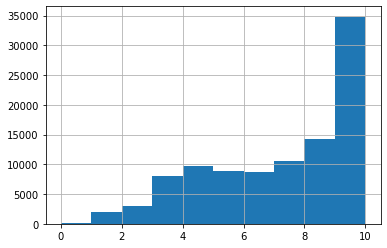

In [11]:
hdf_results["number_of_steps"].hist()

<AxesSubplot:>

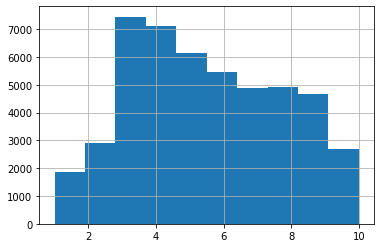

In [12]:
# get solved molecules
solved_molecules = hdf_results[hdf_results["is_solved"] == True]
solved_molecules["number_of_steps"].hist()

## calculate results on desired molecules

In [13]:
dataframe_with_values = "<PATH>/led3_score/data/results/3_molecular_generation/generated_molecules/full_model/used_scorer/chembl200k_zincscore/generated_molecules/Q99685_chembl200k_zincscore_400ep_final_cleaned.csv"
dataframe_with_values = pandas.read_csv(dataframe_with_values)
dataframe_with_values.head()

,LED3Scorer,XGBClassifier,XGBRegressor,SA,SMILES,clean_smiles,clean_smiles_inchi
0,0.999548,0.945937,7.616571,2.312746,O=C(N1CCN(Cc2ccc3c(c2)OCO3)CC1)n1nnc2ccccc21,O=C(N1CCN(Cc2ccc3c(c2)OCO3)CC1)n1nnc2ccccc21,InChI=1S/C19H19N5O3/c25-19(24-16-4-2-1-3-15(16...
1,0.864759,0.512200,6.534688,3.143049,O=C(c1ccc(Cl)c(O)c1)C1CN(Cc2ccncc2Sc2ccccc2)CCN1,O=C(c1ccc(Cl)c(O)c1)C1CN(Cc2ccncc2Sc2ccccc2)CCN1,InChI=1S/C23H22ClN3O2S/c24-19-7-6-16(12-21(19)...
2,0.272041,0.336942,6.825130,3.891020,CCOC1(N2CCC(c3cccc(Cl)c3)CC2)CNC1C(=O)Cc1ccnc(...,CCOC1(N2CCC(c3cccc(Cl)c3)CC2)CNC1C(=O)Cc1ccnc(...,InChI=1S/C23H27Cl2N3O2/c1-2-30-23(15-27-22(23)...
3,0.959909,0.498057,6.439436,2.977346,O=CC=CCN(C(=O)c1cc(O)ccc1F)C(=O)n1nnc2ccccc21,O=CC=CCN(C(=O)c1cc(O)ccc1F)C(=O)n1nnc2ccccc21,InChI=1S/C18H13FN4O4/c19-14-8-7-12(25)11-13(14...
4,0.826217,0.639957,6.746903,2.625418,CN(C)C(=O)c1ccc2c(cnn2C(=O)Nc2ccc(C3CNC3)cc2Cl)c1,CN(C)C(=O)c1ccc2c(cnn2C(=O)Nc2ccc(C3CNC3)cc2Cl)c1,InChI=1S/C20H20ClN5O2/c1-25(2)19(27)13-4-6-18-...


In [14]:
# assert that the target column is the same for azf_results and csv_result
assert (hdf_results["target"] == dataframe_with_values["clean_smiles"]).all(), "The target column and clean_smiles columns are not the same"

AssertionError: The target column and clean_smiles columns are not the same

In [15]:
# get the differences between the target and clean smiles
hdf_results[hdf_results["target"] != dataframe_with_values["clean_smiles"]]

,index,target,search_time,first_solution_time,first_solution_iteration,number_of_nodes,max_transforms,max_children,number_of_routes,number_of_solved_routes,...,number_of_steps,number_of_precursors,number_of_precursors_in_stock,precursors_in_stock,precursors_not_in_stock,precursors_availability,policy_used_counts,profiling,top_scores,trees
4157,7,O=C(OC1CCCN(C(=O)OCC(F)(F)F)C2c3ccc1c2c3)N1CCN...,903.166169,0.0,0,4881,10,37,944,0,...,4,6,5,"OCC(F)(F)F, O=C1CCC(=O)N1O, O=C(O)O, O=C1CCC(=...",O=C(OCc1ccccc1)N1CC2CC(N3CCN(C(=O)OC4CCCNC5C6=...,zinc;zinc;zinc;zinc;zinc;Not in stock,{'uspto': 4880},"{'expansion_calls': 3937, 'reactants_generatio...","0.8167, 0.8167, 0.8152, 0.8144, 0.8144, 0.8144...","[{'type': 'mol', 'hide': False, 'smiles': 'O=C..."


In [16]:
# calculate the inchis for the target column
from rdkit import Chem

def calculate_inchi(smiles):
    mol = Chem.MolFromSmiles(smiles)
    inchi = Chem.MolToInchi(mol)
    return inchi

hdf_results["target_inchi"] = hdf_results["target"].apply(calculate_inchi)

In [17]:
# do a compariosn between the target column and the clean_smiles column on inchi basis because smiles are disambigious
assert (hdf_results["target_inchi"] == dataframe_with_values["clean_smiles_inchi"]).all(), "The target column and clean_smiles columns INCHIS are not the same"
hdf_results[hdf_results["target_inchi"] != dataframe_with_values["clean_smiles_inchi"]]
#print the unique length and the normal length of the inchi column
print("The unique length of the inchi column: ", len(hdf_results["target_inchi"].unique()))
print("The normal length of the inchi column: ", len(hdf_results["target_inchi"]))

print("No join possible!")

The unique length of the inchi column:  99865
The normal length of the inchi column:  100000
No join possible!


In [18]:
# add the dataframe_with_values to the hdf_results for the columns LED3Scorer XGBClassifier	XGBRegressor clean_smiles_inchi
hdf_results["ZINCChembl200kScorer"] = dataframe_with_values["LED3Scorer"]
hdf_results["XGBClassifier"] = dataframe_with_values["XGBClassifier"]
hdf_results["XGBRegressor"] = dataframe_with_values["XGBRegressor"]
hdf_results["clean_smiles_inchi"] = dataframe_with_values["clean_smiles_inchi"]

assert (hdf_results["target_inchi"] == hdf_results["clean_smiles_inchi"]).all(), "The target column and clean_smiles columns INCHIS are not the same"

hdf_results.head()

,index,target,search_time,first_solution_time,first_solution_iteration,number_of_nodes,max_transforms,max_children,number_of_routes,number_of_solved_routes,...,precursors_availability,policy_used_counts,profiling,top_scores,trees,target_inchi,ZINCChembl200kScorer,XGBClassifier,XGBRegressor,clean_smiles_inchi
0,0,O=C(N1CCN(Cc2ccc3c(c2)OCO3)CC1)n1nnc2ccccc21,14.916257,14.916193,1,4,3,1,1,1,...,zinc;zinc;zinc,{'uspto': 3},"{'expansion_calls': 3, 'reactants_generations'...","0.9866, 0.5226, 0.5190, 0.0491","[{'type': 'mol', 'hide': False, 'smiles': 'O=C...",InChI=1S/C19H19N5O3/c25-19(24-16-4-2-1-3-15(16...,0.999548,0.945937,7.616571,InChI=1S/C19H19N5O3/c25-19(24-16-4-2-1-3-15(16...
1,1,O=C(c1ccc(Cl)c(O)c1)C1CN(Cc2ccncc2Sc2ccccc2)CCN1,389.285191,389.285116,295,3441,10,20,557,1,...,zinc;zinc;zinc;zinc;zinc,{'uspto': 3440},"{'expansion_calls': 2884, 'reactants_generatio...","0.9634, 0.8448, 0.8446, 0.8446, 0.8446, 0.8446","[{'type': 'mol', 'hide': False, 'smiles': 'O=C...",InChI=1S/C23H22ClN3O2S/c24-19-7-6-16(12-21(19)...,0.864759,0.512200,6.534688,InChI=1S/C23H22ClN3O2S/c24-19-7-6-16(12-21(19)...
2,2,CCOC1(N2CCC(c3cccc(Cl)c3)CC2)CNC1C(=O)Cc1ccnc(...,900.850742,0.000000,0,7593,10,31,1475,0,...,zinc;zinc;zinc;zinc;zinc;Not in stock;zinc;zinc,{'uspto': 7592},"{'expansion_calls': 6118, 'reactants_generatio...","0.8316, 0.8316, 0.8316, 0.8316, 0.8316, 0.8316...","[{'type': 'mol', 'hide': False, 'smiles': 'CCO...",InChI=1S/C23H27Cl2N3O2/c1-2-30-23(15-27-22(23)...,0.272041,0.336942,6.825130,InChI=1S/C23H27Cl2N3O2/c1-2-30-23(15-27-22(23)...
3,3,O=CC=CCN(C(=O)c1cc(O)ccc1F)C(=O)n1nnc2ccccc21,13.801458,13.801394,9,118,10,9,17,1,...,zinc;zinc;zinc;zinc;zinc,{'uspto': 117},"{'expansion_calls': 101, 'reactants_generation...","0.9524, 0.7940, 0.7940, 0.7940, 0.7926, 0.7926...","[{'type': 'mol', 'hide': False, 'smiles': 'O=C...",InChI=1S/C18H13FN4O4/c19-14-8-7-12(25)11-13(14...,0.959909,0.498057,6.439436,InChI=1S/C18H13FN4O4/c19-14-8-7-12(25)11-13(14...
4,4,CN(C)C(=O)c1ccc2c(cnn2C(=O)Nc2ccc(C3CNC3)cc2Cl)c1,2.348352,2.348297,1,15,9,1,1,1,...,zinc;zinc;zinc;zinc;zinc;zinc;zinc;zinc;zinc;z...,{'uspto': 14},"{'expansion_calls': 14, 'reactants_generations...","0.9503, 0.8640, 0.7603, 0.7392, 0.6393, 0.6393","[{'type': 'mol', 'hide': False, 'smiles': 'CN(...",InChI=1S/C20H20ClN5O2/c1-25(2)19(27)13-4-6-18-...,0.826217,0.639957,6.746903,InChI=1S/C20H20ClN5O2/c1-25(2)19(27)13-4-6-18-...


## confusion matrix

ZINC SCORER AND ZINC BUILDING BLOCKS --> EVALUATION IS CORRECT
The accuracy:  0.71601
The precision:  0.6413416648710767
The recall:  0.9286367985357128
The f1 score:  0.7587027265852685
The mcc:  0.4864237293936791


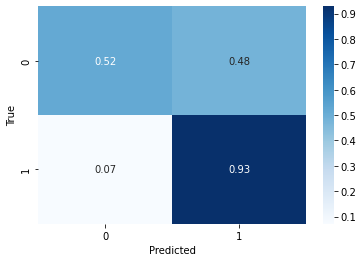

In [19]:
predicted_solved = hdf_results["ZINCChembl200kScorer"] > 0.5
solved = hdf_results["is_solved"]

print("ZINC SCORER AND ZINC BUILDING BLOCKS --> EVALUATION IS CORRECT")
# calculate the accuracy
from sklearn.metrics import accuracy_score
print("The accuracy: ", accuracy_score(solved, predicted_solved))

# calculate the precision
from sklearn.metrics import precision_score
print("The precision: ", precision_score(solved, predicted_solved))

# calculate the recall
from sklearn.metrics import recall_score
print("The recall: ", recall_score(solved, predicted_solved))

# calculate the f1 score
from sklearn.metrics import f1_score
print("The f1 score: ", f1_score(solved, predicted_solved))

# calculate the mcc
from sklearn.metrics import matthews_corrcoef
print("The mcc: ", matthews_corrcoef(solved, predicted_solved))

# visualize the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# normalized

confusion_matrix = confusion_matrix(solved, predicted_solved)
confusion_matrix = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1)[:, numpy.newaxis]
sns.heatmap(confusion_matrix, annot=True, cmap="Blues", fmt=".2f")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [ ]:
## clustering

In [20]:
from multiretro.data.logic.fingerprints.fingerprints import BinaryMorganFingerprint
from multiretro.data.logic.fingerprints.fingerprint_generator import FingerprintGenerator
from multiretro.visualization.logic.umapVisualization import UmapVisualizer

# generate fingerprints
morganFingerprint = BinaryMorganFingerprint(transform_to_numpy_array=False, radius=2, number_of_bits= 1024, use_features= False)
fingerprint_generator = FingerprintGenerator(fingerprint = morganFingerprint)
clustered_azf_results = fingerprint_generator.create_fingerprints_pandas_dataframe(data_frame = hdf_results, smiles_column = "target", fingerprint_column = "fingerprint")

umapVisualizer = UmapVisualizer(dataFrame=clustered_azf_results, dimensions=2)
umapVisualizer.transformRdkitColumn2NumpyArray(columnName="fingerprint", newColumnName="fingerprint_numpy_array")
umapVisualizer.transformNumpyArrayColumnn2NumpyMatrix(columnName="fingerprint_numpy_array")
umapVisualizer.calculateUmapMapper()
umapVisualizer.extractUmapEmbeddings()
#umapVisualizer.calculateMarkerSize(boolean_row = "Centroid")
umapDataFrame = umapVisualizer.getVisualizationDataFrame()
umapDataFrame = umapDataFrame.reset_index(drop = True)

# multiply the max_transforms by -1
umapDataFrame["number_of_steps_marker"] = umapDataFrame["number_of_steps"] * -1

# minmax scale the max_transforms_marker column
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(5, 25))
umapDataFrame["number_of_steps_marker"] = scaler.fit_transform(umapDataFrame[["number_of_steps_marker"]])
umapDataFrame["real_index"] = umapDataFrame.index.to_list()

# visualize the molecules
#umapVisualizer = UmapVisualizer(dataFrame=umapDataFrame)
#app = umapVisualizer.createMolPlotlyVisualization(smilesColumn = 'target', maximumMarkerSize = 25, size = "number_of_steps_marker", colorColumn = "is_solved", captionColumns = ["real_index", "is_solved","target","number_of_steps","LED3Scorer","XGBClassifier","XGBRegressor"])
#app.run_server(mode='jupyterlab',host='0.0.0.0', port=8000, debug=False, proxy=None, use_reloader=False)


# On Alice: ssh -L 8000:localhost:8000 node802
# At Home: ssh -L 8000:localhost:8000 hpc1

2023-03-29 17:22:25.245 | INFO     | multiretro.data.logic.fingerprints.fingerprints:__init__:18 - Fingerprint Binary Morgan Fingerprint with Radius 2 and 1024 bits using Features: False initialized.
<PATH>/workspace/anaconda/envs/multiretro/lib/python3.8/site-packages/umap/umap_.py:1802: UserWarning: gradient function is not yet implemented for jaccard distance metric; inverse_transform will be unavailable
  warn(


In [21]:
print(umapDataFrame.columns)

umapDataFrame = umapDataFrame.drop(columns=['trees', 'fingerprint', 'fingerprint_numpy_array'])
print(len(umapDataFrame))
umapDataFrame.head()

Index(['index', 'target', 'search_time', 'first_solution_time',
       'first_solution_iteration', 'number_of_nodes', 'max_transforms',
       'max_children', 'number_of_routes', 'number_of_solved_routes',
       'top_score', 'is_solved', 'number_of_steps', 'number_of_precursors',
       'number_of_precursors_in_stock', 'precursors_in_stock',
       'precursors_not_in_stock', 'precursors_availability',
       'policy_used_counts', 'profiling', 'top_scores', 'trees',
       'target_inchi', 'ZINCChembl200kScorer', 'XGBClassifier', 'XGBRegressor',
       'clean_smiles_inchi', 'fingerprint', 'fingerprint_numpy_array', 'x',
       'y', 'number_of_steps_marker', 'real_index'],
      dtype='object')
100000


,index,target,search_time,first_solution_time,first_solution_iteration,number_of_nodes,max_transforms,max_children,number_of_routes,number_of_solved_routes,...,top_scores,target_inchi,ZINCChembl200kScorer,XGBClassifier,XGBRegressor,clean_smiles_inchi,x,y,number_of_steps_marker,real_index
0,0,O=C(N1CCN(Cc2ccc3c(c2)OCO3)CC1)n1nnc2ccccc21,14.916257,14.916193,1,4,3,1,1,1,...,"0.9866, 0.5226, 0.5190, 0.0491",InChI=1S/C19H19N5O3/c25-19(24-16-4-2-1-3-15(16...,0.999548,0.945937,7.616571,InChI=1S/C19H19N5O3/c25-19(24-16-4-2-1-3-15(16...,5.322885,2.391765,19.0,0
1,1,O=C(c1ccc(Cl)c(O)c1)C1CN(Cc2ccncc2Sc2ccccc2)CCN1,389.285191,389.285116,295,3441,10,20,557,1,...,"0.9634, 0.8448, 0.8446, 0.8446, 0.8446, 0.8446",InChI=1S/C23H22ClN3O2S/c24-19-7-6-16(12-21(19)...,0.864759,0.512200,6.534688,InChI=1S/C23H22ClN3O2S/c24-19-7-6-16(12-21(19)...,1.874323,4.134027,15.0,1
2,2,CCOC1(N2CCC(c3cccc(Cl)c3)CC2)CNC1C(=O)Cc1ccnc(...,900.850742,0.000000,0,7593,10,31,1475,0,...,"0.8316, 0.8316, 0.8316, 0.8316, 0.8316, 0.8316...",InChI=1S/C23H27Cl2N3O2/c1-2-30-23(15-27-22(23)...,0.272041,0.336942,6.825130,InChI=1S/C23H27Cl2N3O2/c1-2-30-23(15-27-22(23)...,-0.373180,1.623945,7.0,2
3,3,O=CC=CCN(C(=O)c1cc(O)ccc1F)C(=O)n1nnc2ccccc21,13.801458,13.801394,9,118,10,9,17,1,...,"0.9524, 0.7940, 0.7940, 0.7940, 0.7926, 0.7926...",InChI=1S/C18H13FN4O4/c19-14-8-7-12(25)11-13(14...,0.959909,0.498057,6.439436,InChI=1S/C18H13FN4O4/c19-14-8-7-12(25)11-13(14...,7.401538,1.974439,11.0,3
4,4,CN(C)C(=O)c1ccc2c(cnn2C(=O)Nc2ccc(C3CNC3)cc2Cl)c1,2.348352,2.348297,1,15,9,1,1,1,...,"0.9503, 0.8640, 0.7603, 0.7392, 0.6393, 0.6393",InChI=1S/C20H20ClN5O2/c1-25(2)19(27)13-4-6-18-...,0.826217,0.639957,6.746903,InChI=1S/C20H20ClN5O2/c1-25(2)19(27)13-4-6-18-...,6.756947,2.988316,7.0,4


In [22]:
save_path = "<PATH>/led3_score/data/results/3_molecular_generation/generated_molecules/full_model/used_scorer/chembl200k_zincscore/planning_results/zinc_building_blocks/ZINC_BB_Q99685_CHEMBL200K_ZINC_SCORE_results.csv"
#umapDataFrame.to_csv(save_path)

## desired molecules (ZINCChembl200kScorer, XGBClassifier > 0.8)

In [23]:
xgb_molecules = hdf_results[hdf_results["XGBClassifier"] > 0.8]
print("The number of molecules with a XGBClassifier score higher than 0.8: ", len(xgb_molecules))

xgb_molecules_solved = xgb_molecules[xgb_molecules["is_solved"] == True]
print("The number of molecules with a XGBClassifier score higher than 0.8 and are solved: ", len(xgb_molecules_solved))

led3_molecules = hdf_results[hdf_results["ZINCChembl200kScorer"] > 0.8]
print("The number of molecules with a ZINCChembl200kScorer score higher than 0.8: ", len(led3_molecules))
short_list = hdf_results[(hdf_results["ZINCChembl200kScorer"] > 0.8) & (hdf_results["XGBClassifier"] > 0.8)]
print("The number of molecules with a ZINCChembl200kScorer score higher than 0.8 and a XGBClassifier score higher than 0.8: ", len(short_list))

short_list_solved = short_list[short_list["is_solved"] == True]
print("The number of molecules with a ZINCChembl200kScorer score higher than 0.8 and a XGBClassifier score higher than 0.8 and are solved: ", len(short_list_solved))

The number of molecules with a XGBClassifier score higher than 0.8:  51310
The number of molecules with a XGBClassifier score higher than 0.8 and are solved:  26554
The number of molecules with a ZINCChembl200kScorer score higher than 0.8:  54668
The number of molecules with a ZINCChembl200kScorer score higher than 0.8 and a XGBClassifier score higher than 0.8:  27775
The number of molecules with a ZINCChembl200kScorer score higher than 0.8 and a XGBClassifier score higher than 0.8 and are solved:  21440


In [24]:
# reset index of shortlist
short_list = short_list.reset_index(drop = True)
short_list.head()

,index,target,search_time,first_solution_time,first_solution_iteration,number_of_nodes,max_transforms,max_children,number_of_routes,number_of_solved_routes,...,trees,target_inchi,ZINCChembl200kScorer,XGBClassifier,XGBRegressor,clean_smiles_inchi,fingerprint,fingerprint_numpy_array,x,y
0,0,O=C(N1CCN(Cc2ccc3c(c2)OCO3)CC1)n1nnc2ccccc21,14.916257,14.916193,1,4,3,1,1,1,...,"[{'type': 'mol', 'hide': False, 'smiles': 'O=C...",InChI=1S/C19H19N5O3/c25-19(24-16-4-2-1-3-15(16...,0.999548,0.945937,7.616571,InChI=1S/C19H19N5O3/c25-19(24-16-4-2-1-3-15(16...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...","[False, False, False, False, False, False, Fal...",5.322885,2.391765
1,5,O=C(Cc1ccc(N2CCN(C(=O)n3cnc4ccccc43)CC2)cc1)n1...,901.223341,0.000000,0,3919,10,31,1202,0,...,"[{'type': 'mol', 'hide': False, 'smiles': 'O=C...",InChI=1S/C22H20FN7O2/c23-21-25-15-30(26-21)20(...,0.983851,0.918154,7.413787,InChI=1S/C22H20FN7O2/c23-21-25-15-30(26-21)20(...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[False, False, False, False, False, False, Fal...",5.834311,2.373635
2,6,CC(=O)N(c1ccc(-c2nc3ccccc3s2)cc1)n1cnc2ccccc21,80.137407,80.137367,43,481,10,10,134,1,...,"[{'type': 'mol', 'hide': False, 'smiles': 'CC(...",InChI=1S/C22H16N4OS/c1-15(27)26(25-14-23-18-6-...,0.914813,0.853164,6.885526,InChI=1S/C22H16N4OS/c1-15(27)26(25-14-23-18-6-...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[False, False, False, False, False, False, Fal...",4.891810,0.150031
3,7,O=C1NCC1c1ccc(COC2CN(C(=O)c3nccs3)C2)cc1,61.857952,61.857906,45,466,10,10,71,1,...,"[{'type': 'mol', 'hide': False, 'smiles': 'O=C...",InChI=1S/C17H17N3O3S/c21-15-14(7-19-15)12-3-1-...,0.830787,0.873244,7.226131,InChI=1S/C17H17N3O3S/c21-15-14(7-19-15)12-3-1-...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, ...","[False, False, False, False, False, False, Fal...",-2.568662,4.763013
4,8,N#Cc1cccc(Oc2ccc(C(=O)N3CCN(C(=O)c4nccs4)CC3)c...,0.220531,0.220468,1,4,3,1,1,1,...,"[{'type': 'mol', 'hide': False, 'smiles': 'N#C...",InChI=1S/C21H17N5O3S/c22-13-15-2-1-3-17(12-15)...,0.988824,0.962520,7.034134,InChI=1S/C21H17N5O3S/c22-13-15-2-1-3-17(12-15)...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...","[False, False, False, False, False, False, Fal...",-1.919118,4.467514


In [25]:
provided_short_list = "<PATH>/led3_score/data/results/3_molecular_generation/generated_molecules/full_model/used_scorer/chembl200k_zincscore/generated_molecules/Q99685_chembl200k_zincscore_400ep_final_shortlist.csv"
provided_short_list = pandas.read_csv(provided_short_list)
print(len(provided_short_list))
provided_short_list["clean_smiles_inchi"] = provided_short_list["SMILES"].apply(calculate_inchi)
provided_short_list.head()

27775


,SMILES,LED3Scorer,XGBClassifier,XGBRegressor,SA,closest_training_molecule_similarity,closest_training_molecule,clean_smiles_inchi
0,O=C(N1CCN(Cc2ccc3c(c2)OCO3)CC1)n1nnc2ccccc21,0.999548,0.945937,7.616571,2.312746,0.649351,O=C(N1CCN(Cc2ccccc2)CC1)n1nnc2c1cccc2,InChI=1S/C19H19N5O3/c25-19(24-16-4-2-1-3-15(16...
1,O=C(Cc1ccc(N2CCN(C(=O)n3cnc4ccccc43)CC2)cc1)n1...,0.983851,0.918154,7.413787,2.886256,0.346535,COc1ccc(N2CCN(C(=O)n3nnc4c3cccc4)CC2)cc1,InChI=1S/C22H20FN7O2/c23-21-25-15-30(26-21)20(...
2,CC(=O)N(c1ccc(-c2nc3ccccc3s2)cc1)n1cnc2ccccc21,0.914813,0.853164,6.885526,2.543694,0.472527,O=C(Cn1cnc2c1cccc2)Nc1ccc(-c2nc3c(cccc3)s2)cc1,InChI=1S/C22H16N4OS/c1-15(27)26(25-14-23-18-6-...
3,O=C1NCC1c1ccc(COC2CN(C(=O)c3nccs3)C2)cc1,0.830787,0.873244,7.226131,3.142244,0.309735,O=C(c1nccs1)N1CCN(C2CC(=O)N(c3cccc(OCc4ccccc4)...,InChI=1S/C17H17N3O3S/c21-15-14(7-19-15)12-3-1-...
4,N#Cc1cccc(Oc2ccc(C(=O)N3CCN(C(=O)c4nccs4)CC3)c...,0.988824,0.962520,7.034134,2.463407,0.357143,O=C(c1nccs1)N1CCN(C2CC(=O)N(c3cccc(Oc4ccccc4)c...,InChI=1S/C21H17N5O3S/c22-13-15-2-1-3-17(12-15)...


In [26]:
# assert that the short_list and provided_short_list are the same target_inchi and clean_smiles_inchi
assert (short_list["target_inchi"] == provided_short_list["clean_smiles_inchi"]).all(), "The target column and clean_smiles columns INCHIS are not the same"

In [27]:
short_list["closest_training_molecule_similarity"] = provided_short_list["closest_training_molecule_similarity"]
short_list["closest_training_molecule"] = provided_short_list["closest_training_molecule"]
short_list.head()

,index,target,search_time,first_solution_time,first_solution_iteration,number_of_nodes,max_transforms,max_children,number_of_routes,number_of_solved_routes,...,ZINCChembl200kScorer,XGBClassifier,XGBRegressor,clean_smiles_inchi,fingerprint,fingerprint_numpy_array,x,y,closest_training_molecule_similarity,closest_training_molecule
0,0,O=C(N1CCN(Cc2ccc3c(c2)OCO3)CC1)n1nnc2ccccc21,14.916257,14.916193,1,4,3,1,1,1,...,0.999548,0.945937,7.616571,InChI=1S/C19H19N5O3/c25-19(24-16-4-2-1-3-15(16...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...","[False, False, False, False, False, False, Fal...",5.322885,2.391765,0.649351,O=C(N1CCN(Cc2ccccc2)CC1)n1nnc2c1cccc2
1,5,O=C(Cc1ccc(N2CCN(C(=O)n3cnc4ccccc43)CC2)cc1)n1...,901.223341,0.000000,0,3919,10,31,1202,0,...,0.983851,0.918154,7.413787,InChI=1S/C22H20FN7O2/c23-21-25-15-30(26-21)20(...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[False, False, False, False, False, False, Fal...",5.834311,2.373635,0.346535,COc1ccc(N2CCN(C(=O)n3nnc4c3cccc4)CC2)cc1
2,6,CC(=O)N(c1ccc(-c2nc3ccccc3s2)cc1)n1cnc2ccccc21,80.137407,80.137367,43,481,10,10,134,1,...,0.914813,0.853164,6.885526,InChI=1S/C22H16N4OS/c1-15(27)26(25-14-23-18-6-...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[False, False, False, False, False, False, Fal...",4.891810,0.150031,0.472527,O=C(Cn1cnc2c1cccc2)Nc1ccc(-c2nc3c(cccc3)s2)cc1
3,7,O=C1NCC1c1ccc(COC2CN(C(=O)c3nccs3)C2)cc1,61.857952,61.857906,45,466,10,10,71,1,...,0.830787,0.873244,7.226131,InChI=1S/C17H17N3O3S/c21-15-14(7-19-15)12-3-1-...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, ...","[False, False, False, False, False, False, Fal...",-2.568662,4.763013,0.309735,O=C(c1nccs1)N1CCN(C2CC(=O)N(c3cccc(OCc4ccccc4)...
4,8,N#Cc1cccc(Oc2ccc(C(=O)N3CCN(C(=O)c4nccs4)CC3)c...,0.220531,0.220468,1,4,3,1,1,1,...,0.988824,0.962520,7.034134,InChI=1S/C21H17N5O3S/c22-13-15-2-1-3-17(12-15)...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...","[False, False, False, False, False, False, Fal...",-1.919118,4.467514,0.357143,O=C(c1nccs1)N1CCN(C2CC(=O)N(c3cccc(Oc4ccccc4)c...


In [28]:
# print the number of molecules in the short list
print("The number of molecules in the short list: ", len(short_list))

# get the number of molecules in the short list that are solved
print("The number of molecules in the short list that are solved:", len(short_list[short_list["is_solved"] == True]))

# percentage of solved molecules in the short list
print("The percentage of solved molecules in the short list: ", len(short_list[short_list["is_solved"] == True]) / len(short_list))

The number of molecules in the short list:  27775
The number of molecules in the short list that are solved: 21440
The percentage of solved molecules in the short list:  0.771917191719172


<AxesSubplot:>

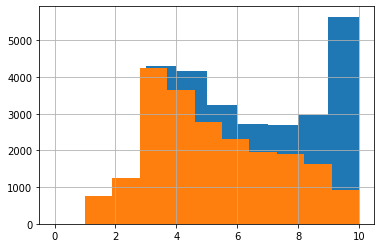

In [29]:
# hist of the number of steps for the short list
short_list["number_of_steps"].hist()

# hist in the short list that are solved
short_list[short_list["is_solved"] == True]["number_of_steps"].hist()

<AxesSubplot:>

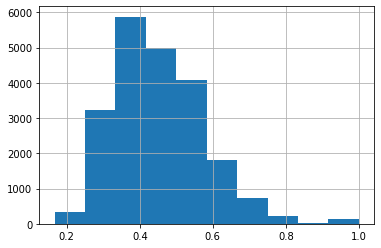

In [30]:
short_list[short_list["is_solved"] == True]["closest_training_molecule_similarity"].hist()

In [31]:
# solved and tanimoto similarity < 0.6

short_list["solved_and_unique"] = short_list["is_solved"] & (short_list["closest_training_molecule_similarity"] < 0.6)

# get index 9779 row
short_list[short_list.index == 9779]

,index,target,search_time,first_solution_time,first_solution_iteration,number_of_nodes,max_transforms,max_children,number_of_routes,number_of_solved_routes,...,XGBClassifier,XGBRegressor,clean_smiles_inchi,fingerprint,fingerprint_numpy_array,x,y,closest_training_molecule_similarity,closest_training_molecule,solved_and_unique
9779,4,Nc1ccc(-c2c(Cl)cccc2C=O)cc1N1CCN(C(=O)n2nnc3cc...,1.236991,1.236938,1,10,6,2,2,1,...,0.833057,6.948329,InChI=1S/C24H21ClN6O2/c25-18-5-3-4-17(15-32)23...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[False, False, False, False, False, False, Fal...",9.835221,3.30547,0.479167,O=C(N1CCN(c2ccccc2F)CC1)n1nnc2ccccc21,True


## umap clustering

In [ ]:
from multiretro.data.logic.fingerprints.fingerprints import BinaryMorganFingerprint
from multiretro.data.logic.fingerprints.fingerprint_generator import FingerprintGenerator
from multiretro.visualization.logic.umapVisualization import UmapVisualizer

# generate fingerprints
morganFingerprint = BinaryMorganFingerprint(transform_to_numpy_array=False, radius=2, number_of_bits= 1024, use_features= False)
fingerprint_generator = FingerprintGenerator(fingerprint = morganFingerprint)
clustered_azf_results = fingerprint_generator.create_fingerprints_pandas_dataframe(data_frame = short_list, smiles_column = "target", fingerprint_column = "fingerprint")

umapVisualizer = UmapVisualizer(dataFrame=clustered_azf_results, dimensions=2)
umapVisualizer.transformRdkitColumn2NumpyArray(columnName="fingerprint", newColumnName="fingerprint_numpy_array")
umapVisualizer.transformNumpyArrayColumnn2NumpyMatrix(columnName="fingerprint_numpy_array")
umapVisualizer.calculateUmapMapper()
umapVisualizer.extractUmapEmbeddings()
#umapVisualizer.calculateMarkerSize(boolean_row = "Centroid")
umapDataFrame = umapVisualizer.getVisualizationDataFrame()
umapDataFrame = umapDataFrame.reset_index(drop = True)

# multiply the max_transforms by -1
umapDataFrame["number_of_steps_marker"] = umapDataFrame["number_of_steps"] * -1

# minmax scale the max_transforms_marker column
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(5, 25))
umapDataFrame["number_of_steps_marker"] = scaler.fit_transform(umapDataFrame[["number_of_steps_marker"]])
umapDataFrame["real_index"] = umapDataFrame.index.to_list()

# visualize the molecules
#umapVisualizer = UmapVisualizer(dataFrame=umapDataFrame)
#app = umapVisualizer.createMolPlotlyVisualization(smilesColumn = 'target', maximumMarkerSize = 25, size = "number_of_steps_marker", colorColumn = "solved_and_unique", captionColumns = ["real_index", "is_solved","target","number_of_steps","LED3Scorer","XGBClassifier","XGBRegressor", "closest_training_molecule_similarity", "closest_training_molecule"])
#app.run_server(mode='jupyterlab',host='0.0.0.0', port=8000, debug=False, proxy=None, use_reloader=False)


# On Alice: ssh -L 8000:localhost:8000 node802
# At Home: ssh -L 8000:localhost:8000 hpc1


In [33]:
print(umapDataFrame.columns)

Index(['index', 'target', 'search_time', 'first_solution_time',
       'first_solution_iteration', 'number_of_nodes', 'max_transforms',
       'max_children', 'number_of_routes', 'number_of_solved_routes',
       'top_score', 'is_solved', 'number_of_steps', 'number_of_precursors',
       'number_of_precursors_in_stock', 'precursors_in_stock',
       'precursors_not_in_stock', 'precursors_availability',
       'policy_used_counts', 'profiling', 'top_scores', 'trees',
       'target_inchi', 'ZINCChembl200kScorer', 'XGBClassifier', 'XGBRegressor',
       'clean_smiles_inchi', 'fingerprint', 'fingerprint_numpy_array', 'x',
       'y', 'closest_training_molecule_similarity',
       'closest_training_molecule', 'solved_and_unique',
       'number_of_steps_marker', 'real_index'],
      dtype='object')


In [34]:
print(umapDataFrame.columns)

# remove 'trees', 'molecule_results', 'fingerprint', 'fingerprint_numpy_array', columns
umapDataFrame = umapDataFrame.drop(columns=['trees', 'fingerprint', 'fingerprint_numpy_array'])

umapDataFrame.head()

Index(['index', 'target', 'search_time', 'first_solution_time',
       'first_solution_iteration', 'number_of_nodes', 'max_transforms',
       'max_children', 'number_of_routes', 'number_of_solved_routes',
       'top_score', 'is_solved', 'number_of_steps', 'number_of_precursors',
       'number_of_precursors_in_stock', 'precursors_in_stock',
       'precursors_not_in_stock', 'precursors_availability',
       'policy_used_counts', 'profiling', 'top_scores', 'trees',
       'target_inchi', 'ZINCChembl200kScorer', 'XGBClassifier', 'XGBRegressor',
       'clean_smiles_inchi', 'fingerprint', 'fingerprint_numpy_array', 'x',
       'y', 'closest_training_molecule_similarity',
       'closest_training_molecule', 'solved_and_unique',
       'number_of_steps_marker', 'real_index'],
      dtype='object')


,index,target,search_time,first_solution_time,first_solution_iteration,number_of_nodes,max_transforms,max_children,number_of_routes,number_of_solved_routes,...,XGBClassifier,XGBRegressor,clean_smiles_inchi,x,y,closest_training_molecule_similarity,closest_training_molecule,solved_and_unique,number_of_steps_marker,real_index
0,0,O=C(N1CCN(Cc2ccc3c(c2)OCO3)CC1)n1nnc2ccccc21,14.916257,14.916193,1,4,3,1,1,1,...,0.945937,7.616571,InChI=1S/C19H19N5O3/c25-19(24-16-4-2-1-3-15(16...,-0.069203,1.906725,0.649351,O=C(N1CCN(Cc2ccccc2)CC1)n1nnc2c1cccc2,False,19.0,0
1,5,O=C(Cc1ccc(N2CCN(C(=O)n3cnc4ccccc43)CC2)cc1)n1...,901.223341,0.000000,0,3919,10,31,1202,0,...,0.918154,7.413787,InChI=1S/C22H20FN7O2/c23-21-25-15-30(26-21)20(...,1.167956,2.948834,0.346535,COc1ccc(N2CCN(C(=O)n3nnc4c3cccc4)CC2)cc1,False,15.0,1
2,6,CC(=O)N(c1ccc(-c2nc3ccccc3s2)cc1)n1cnc2ccccc21,80.137407,80.137367,43,481,10,10,134,1,...,0.853164,6.885526,InChI=1S/C22H16N4OS/c1-15(27)26(25-14-23-18-6-...,2.789882,5.929063,0.472527,O=C(Cn1cnc2c1cccc2)Nc1ccc(-c2nc3c(cccc3)s2)cc1,True,17.0,2
3,7,O=C1NCC1c1ccc(COC2CN(C(=O)c3nccs3)C2)cc1,61.857952,61.857906,45,466,10,10,71,1,...,0.873244,7.226131,InChI=1S/C17H17N3O3S/c21-15-14(7-19-15)12-3-1-...,8.094580,9.247506,0.309735,O=C(c1nccs1)N1CCN(C2CC(=O)N(c3cccc(OCc4ccccc4)...,True,11.0,3
4,8,N#Cc1cccc(Oc2ccc(C(=O)N3CCN(C(=O)c4nccs4)CC3)c...,0.220531,0.220468,1,4,3,1,1,1,...,0.962520,7.034134,InChI=1S/C21H17N5O3S/c22-13-15-2-1-3-17(12-15)...,8.223723,8.849620,0.357143,O=C(c1nccs1)N1CCN(C2CC(=O)N(c3cccc(Oc4ccccc4)c...,True,19.0,4


In [35]:
#umapDataFrame.to_csv("<PATH>/led3_score/data/results/3_molecular_generation/generated_molecules/full_model/used_scorer/chembl200k_zincscore/planning_results/zinc_building_blocks/ZINC_BB_Q99685_CHEMBL200K_ZINC_SCORE_results_shortlist.csv")